# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: de Antón Santiago, Sara
*   Alumno 2: Sánchez La O, Benjamín C.
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['weights', '.ipynb_checkpoints']


---
### 1.4. Instalar librerías necesarias

In [3]:
# NO EJECUTAR EN SAGEMAKER (MIRAR EL README PARA CONFIGURAR EL ENTORNO)
# AUNQUE DE FALLOS DE INSTALACIÓN LOS IMPORTS FUNCIONAN
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=f34cc54c21c246fe08fda6fe96d454764552f154159c392d5b96cc978f58efab
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.12.1 requires cloud

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

In [1]:
# DEFINIR AL PRINCIPIO
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

#### Importar librerías

In [43]:
from __future__ import division

from PIL import Image
import numpy as np
import gym
import os
import glob

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# AÑADIDO
from tensorflow.keras.layers import Lambda, BatchNormalization
from tensorflow.keras.callbacks import Callback
import json
import pandas as pd
import matplotlib.pyplot as plt

#### Configuración base

In [73]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [74]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [76]:
# HIPERPARÁMETROS POR DEFECTO
hiperparametros = {
    "MEMORY_SIZE": 1000000,
    "WARMUP_STEPS": 50000,
    "SCHEDULER_STEPS": 1000000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 10000,
    "LEARNING_RATE": 0.00025,
    "MODEL_CHECKPOINT_STEPS": 25000,
    "TRAIN_STEPS": 1750000,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0
}

In [77]:
# ROOT PATH PARA LOS MODELOS Y SUS PESOS
if IN_COLAB:
  mount='/content/gdrive'
  drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"
  MODELS_DIR=drive_root+"/models"
else:
  MODELS_DIR="./models"

def get_dirs(model_name="modelo1"):
    WEIGHTS_DIR = os.path.join(MODELS_DIR, model_name, "weights")
    CHECKPOINTS_DIR = os.path.join(MODELS_DIR, model_name, "checkpoints")
    MODEL_DIR = os.path.join(MODELS_DIR, model_name)
    os.makedirs(WEIGHTS_DIR, exist_ok=True)
    os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
    return MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR

def save_hyperparams(model_name="modelo1"):
    '''
    Guarda los hiperparametros en memoria a fichero, si no los hay guarda los definidos por defecto.
    '''
    model_dir, _, _ = get_dirs(model_name)
    hiperparametros = {
        "MEMORY_SIZE": MEMORY_SIZE,
        "WARMUP_STEPS": WARMUP_STEPS,
        "SCHEDULER_STEPS": SCHEDULER_STEPS,
        "GAMMA": GAMMA,
        "MODEL_UPDATE": MODEL_UPDATE,
        "LEARNING_RATE": LEARNING_RATE,
        "MODEL_CHECKPOINT_STEPS": MODEL_CHECKPOINT_STEPS,
        "TRAIN_STEPS": TRAIN_STEPS,
        "LOG_INTERVAL": LOG_INTERVAL,
        "DELTA_CLIP": DELTA_CLIP
    }

    hyper_file = os.path.join(model_dir, model_name + '.json')

    with open(hyper_file, 'w') as f:
        json.dump(hiperparametros, f, indent=4)

    print(f"Hiperparámetros guardados en {hyper_file}")


def load_hyperparams(modelo):
    """
    Actualiza los hiperparámetros definidos en memoria a los del fichero cargado.
    """
    hyper_file = os.path.join(MODELS_DIR, modelo, modelo + '.json')
    global MEMORY_SIZE, WARMUP_STEPS, SCHEDULER_STEPS, GAMMA, MODEL_UPDATE, LEARNING_RATE, MODEL_CHECKPOINT_STEPS, TRAIN_STEPS, LOG_INTERVAL, DELTA_CLIP

    if not os.path.exists(hyper_file):
        # HIPERPARÁMETROS
        MEMORY_SIZE = hiperparametros["MEMORY_SIZE"]
        WARMUP_STEPS = hiperparametros["WARMUP_STEPS"]
        SCHEDULER_STEPS = hiperparametros["SCHEDULER_STEPS"]
        GAMMA = hiperparametros["GAMMA"]
        MODEL_UPDATE = hiperparametros["MODEL_UPDATE"]
        LEARNING_RATE = hiperparametros["LEARNING_RATE"]
        MODEL_CHECKPOINT_STEPS = hiperparametros["MODEL_CHECKPOINT_STEPS"]
        TRAIN_STEPS = hiperparametros["TRAIN_STEPS"]
        LOG_INTERVAL = hiperparametros["LOG_INTERVAL"]
        DELTA_CLIP = hiperparametros["DELTA_CLIP"]
        print(f"[INFO] Cargados hiperparámetros por defecto.")
        save_hyperparams(modelo)

        return None

    with open(hyper_file, 'r') as f:
        params = json.load(f)

    # HIPERPARÁMETROS
    MEMORY_SIZE = params["MEMORY_SIZE"]
    WARMUP_STEPS = params["WARMUP_STEPS"]
    SCHEDULER_STEPS = params["SCHEDULER_STEPS"]
    GAMMA = params["GAMMA"]
    MODEL_UPDATE = params["MODEL_UPDATE"]
    LEARNING_RATE = params["LEARNING_RATE"]
    MODEL_CHECKPOINT_STEPS = params["MODEL_CHECKPOINT_STEPS"]
    TRAIN_STEPS = params["TRAIN_STEPS"]
    LOG_INTERVAL = params["LOG_INTERVAL"]
    DELTA_CLIP = params["DELTA_CLIP"]

    print(f"Hiperparámetros cargados desde {hyper_file}")

In [78]:

def graph_training(log_path, model_dir, model_name, variable='mean_q'):
  with open(log_path) as f:
    data = json.load(f)
    print(len(data[variable]))
    pd.DataFrame(data[variable]).plot(title=f"{model_name}: Evolución - {variable}", legend=False)
    plt.xlabel('Steps')
    plt.ylabel(str(variable))
    plt.savefig(model_dir+"/"+ model_name + '_' + variable + '.png')

# MODELO 1

### Red neuronal basada en el paper: https://arxiv.org/pdf/1312.5602

En el paper se implementa una red neuronal convolucional que tiene de entrada una pila de cuatro imágenes en escala de grises de 84×84. La red tiene de tres capas convolucionales: la 1ª con 32 filtros de 8×8 y un stride 4, la 2ª con 64 filtros de 4×4 y un stride 2, y la 3ª con 64 filtros de 3×3 y stride 1, todas con activación ReLU. Depués, las salidas se aplanan y se pasan por una una capa densa de 512 neuronas con activación ReLU, seguida de una capa de salida lineal con una neurona por cada acción posible, que son los valores Q predichos.

#### Con las siguientes modificaciones:
Se ha incorporado la normalización de las imágenes al rango 0-1, que como se ha visto en redes neuronales puede estabilizar mejor el entrenamiento. También, se han añadido capas de BatchNormalization porque también se ha estudiado en la misma asgnatura que acelera la convergencia y reduce el riesgo de que exploten los gradientes.

## DQN
DQN implementado basándose en el github oficial de keras rl2: https://github.com/inarikami/keras-rl2/tree/master

1. Implementación de la red neuronal

In [80]:
model_name="modelo1"

model = Sequential()

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# Rorganizar las imágenes para que el window length quede en la dimensión de los canales
if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, H, W) → (H, W, 4)
elif K.image_data_format() == 'channels_first':
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Normalizar los valores de píxeles
model.add(Lambda(lambda x: x / 255.0))

# Primera capa convolucional
model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Segunda
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Tercera
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Densas
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Salida con el número de acciones
model.add(Dense(nb_actions))
model.add(Activation('linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 lambda_1 (Lambda)           (None, 84, 84, 4)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 batch_normalization_3 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 20, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                      

2. Implementación de la solución DQN

In [81]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# save_hyperparams(HYPERPARAMETERS_DIR, filename=model_name+".json")
load_hyperparams(model_name)

Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1.json


In [82]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [83]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [84]:
class AccumulatedCheckpoint(Callback):
    def __init__(self, base_path, interval, initial_step=0):
        super().__init__()
        self.base_path = base_path
        self.interval = interval
        self.total_steps = initial_step
        print(f"Callback iniciado desde paso {self.total_steps}")

    def on_step_end(self, step, logs={}):
        self.total_steps += 1
        if self.total_steps % self.interval == 0:
            filename = self.base_path.format(step=self.total_steps)
            self.model.save_weights(filename, overwrite=True)
            print(f"[Checkpoint] Guardado en paso {self.total_steps}: {filename}")

In [99]:
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))

callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS),
    FileLogger(log_filename, interval=100)
]

In [105]:
# Buscar todos los checkpoints por su archivo .index
pattern = os.path.join(CHECKPOINTS_DIR, f'dqn_{env_name}_weights_*.h5f.index')
checkpoints = glob.glob(pattern)

# Valor por defecto si no se encuentra checkpoint
last_checkpoint_steps = 0

if checkpoints:
    # Extraer el número de paso del nombre
    def extract_step(filename):
        try:
            name = os.path.basename(filename)
            step_part = name.split('_weights_')[1].replace('.h5f.index', '')
            return int(step_part)
        except:
            return -1

    # Seleccionar el checkpoint con mayor número de pasos
    latest_index = max(checkpoints, key=extract_step)

    # Quitar la extensión .index para obtener el nombre base
    latest_checkpoint = latest_index.replace('.index', '')

    print(f"[DQN] Cargando último checkpoint: {latest_checkpoint}")
    dqn.load_weights(latest_checkpoint)

    # Aquí extraemos los pasos acumulados
    last_checkpoint_steps = extract_step(latest_index)
else:
    print("[DQN] No se encontró ningún checkpoint, entrenamiento desde cero.")

[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/dqn_SpaceInvaders-v0_weights_400000.h5f


In [106]:
# Custom callback for checkpoints to restart from the last one
checkpoint_callback = AccumulatedCheckpoint(
      base_path=checkpoint_weights_filename,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
print("Stps que llevaba el modelo entrenado:", dqn.step)
#callbacks =  [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)] # Gives some errors

Callback iniciado desde paso 400000
Stps que llevaba el modelo entrenado: 400000


In [108]:
# ENTRENAR DQN
if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Training for 1000 steps ...
Interval 1 (0 steps performed)
  990/10000 [=>............................] - ETA: 57s - reward: 0.0172done, took 6.437 seconds


In [109]:
# Testing part to calculate the mean reward
weights_filename =os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))

print(weights_filename)
dqn.load_weights(latest_checkpoint)
dqn.test(env, nb_episodes=10, visualize=False)

/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/weights/dqn_SpaceInvaders-v0_weights_modelo1.h5f
Testing for 10 episodes ...
Episode 1: reward: 0.000, steps: 917
Episode 2: reward: 0.000, steps: 909
Episode 3: reward: 0.000, steps: 923
Episode 4: reward: 0.000, steps: 926
Episode 5: reward: 0.000, steps: 937
Episode 6: reward: 0.000, steps: 932
Episode 7: reward: 0.000, steps: 914
Episode 8: reward: 0.000, steps: 917
Episode 9: reward: 0.000, steps: 900
Episode 10: reward: 0.000, steps: 916


1


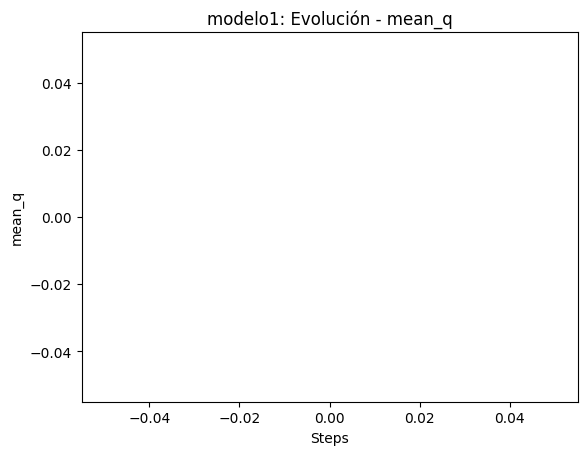

In [71]:
graph_training(log_filename, MODEL_DIR, model_name, 'mean_q')

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---